In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from PG_algorithms import *
from model_functions import *
import gym
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import functional as F
from PolicyPi import PolicyPi

#np.set_printoptions(precision=4)
import math
from utils import *
from ActorCritic import *

nS = 150
nA = 2
seed = get_current_seed()
seed = 44697628841978080856580175700798794719
gamma = .99
mu = np.zeros(nS)
if nS % 2 == 0:
    mu[nS//2] = 0.5
    mu[nS//2 - 1] = 0.5
else:
    mu[math.ceil(nS//2)] = 1.
    
river = River(nS, mu, small=5, large=100000, seed=seed, r_shape=True)
tau = 1.
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)


Current seed for result reproducibility: 146583201416062889975161977130350663453


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
actor_func = ActorNet(nS, nA, hidden_dim=nS).to(device)
value_func = ValueNet(nS, hidden_dim=nS).to(device)
q_func = QNet(nS, nA, hidden_dim=nS+nA).to(device)

In [3]:
tmdp.reset()

tmdp.update_tau(.5)
loss_param = list(actor_func.parameters()) + list(value_func.parameters())
loss_opt = torch.optim.AdamW(loss_param, lr=1e-3)
q_opt = torch.optim.AdamW(q_func.parameters(), lr=1e-3)

cur_res = curriculum_PPO(tmdp, actor_func, value_func, q_func, loss_opt, 
                         q_opt, alpha=.02, eps=.2, vf_coeff=.5, h_coeff=0.3, 
                         episodes=600000, batch_nS=1, biased=False)


RuntimeError: size mismatch, got input (92), mat (92x1), vec (92)

In [ ]:
res = bellman_optimal_q(tmdp.env.P_mat, tmdp.env.reward, tmdp.gamma)
Q = res["Q"]

d = compute_d_from_tau(tmdp.env.mu, tmdp.env.P_mat, tmdp.xi, get_policy(Q), tmdp.gamma, 0.)
d_curr = compute_d_from_tau(tmdp.env.mu, tmdp.P_mat_tau, tmdp.xi, get_policy(actor_func.get_probabilities()), tmdp.gamma, 0.)

print(get_policy(Q) - get_policy(actor_func.get_probabilities()))

r_s_a = compute_r_s_a(tmdp.env.P_mat, tmdp.env.reward)

j_opt = compute_j(r_s_a, get_policy(Q), d, tmdp.gamma)
j_curr = compute_j(r_s_a, get_policy(actor_func.get_probabilities()), d_curr, tmdp.gamma)
print("optimal performance: ",j_opt, "curriculum performance: ",j_curr)
print(get_policy(actor_func.get_probabilities()))

[[ 0.  0.]
 [ 0.  0.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]

In [ ]:
Q = res["Q"]
print(get_policy(Q))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

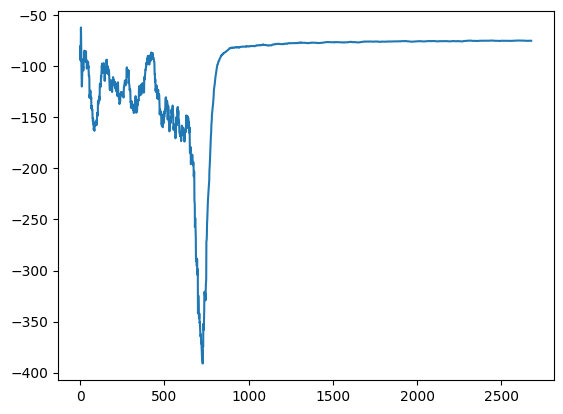

In [ ]:
import matplotlib.pyplot as plt
reward_records = cur_res["reward_records"]
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
#plt.plot(reward_records)
plt.plot(average_reward)
